<a href="https://colab.research.google.com/github/mk7890/Python_Data_Analysis/blob/main/Food_carbon_footprint_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
foodCarbon = pd.read_csv(url)
foodCarbon.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [3]:
foodCarbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [4]:
foodCarbon.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [5]:
foodCarbon.isnull().sum()

,0
country,0
food_category,0
consumption,0
co2_emmission,0


In [6]:
foodCarbon.to_csv('foodCarbonFootprint.csv')

In [7]:
foodCarbon = pd.DataFrame(foodCarbon)
foodCarbon

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27


In [8]:
foodCarbon.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [9]:
foodCarbon['food_category'].value_counts()

,count
food_category,
Pork,130
Poultry,130
Beef,130
Lamb & Goat,130
Fish,130
Eggs,130
Milk - inc. cheese,130
Wheat and Wheat Products,130
Rice,130


# **1. The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.**




- Filter the dataset to include only the specified countries: Kenya, Uganda, Tanzania, Rwanda, and Ethiopia.


- Group the data by food_category to calculate the average CO₂ emissions per person for each category within the filtered countries.


- Plot the results using a bar chart to visualize the average CO₂ emissions by food category.

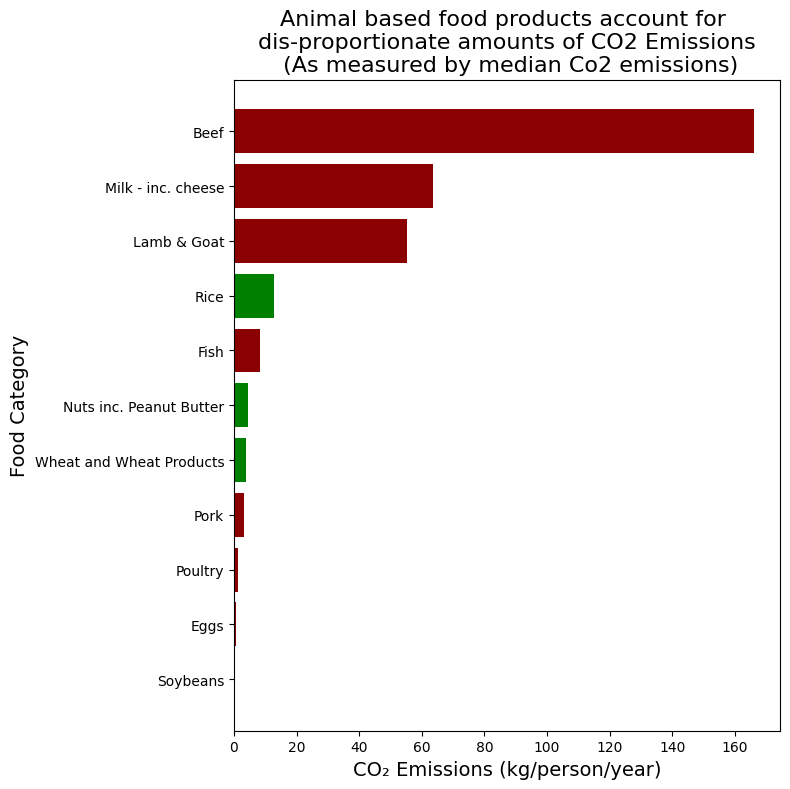

In [10]:

# Define the countries of interest
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']

# Filter the dataset for the specified East African countries
east_africa_data = foodCarbon[foodCarbon['country'].isin(east_african_countries)]

# Calculate the average CO2 emission per person by food category for these countries
avg_co2_by_food_category = east_africa_data.groupby('food_category')['co2_emmission'].mean().reset_index()

# Sort by CO2 emissions for better visualization
avg_co2_by_food_category.sort_values(by='co2_emmission', ascending=True, inplace=True)

# Define categories to color green
green_categories = ["Rice", "Wheat and Wheat Products", "Nuts inc. Peanut Butter", "Soybeans"]

# Assign colors based on the food category using numpy.where
avg_co2_by_food_category['color'] = np.where(
    avg_co2_by_food_category['food_category'].isin(green_categories), 'green', 'darkred'
)

# Plot using Matplotlib
plt.figure(figsize=(8, 8))
bars = plt.barh(
    avg_co2_by_food_category['food_category'],
    avg_co2_by_food_category['co2_emmission'],
    color=avg_co2_by_food_category['color']
)

# Add titles and labels
plt.title('Animal based food products account for \ndis-proportionate amounts of CO2 Emissions\n (As measured by median Co2 emissions)', fontsize=16)
plt.xlabel('CO₂ Emissions (kg/person/year)', fontsize=14)
plt.ylabel('Food Category', fontsize=14)
#plt.grid(axis='x', linestyle='--')


plt.tight_layout()
plt.show()


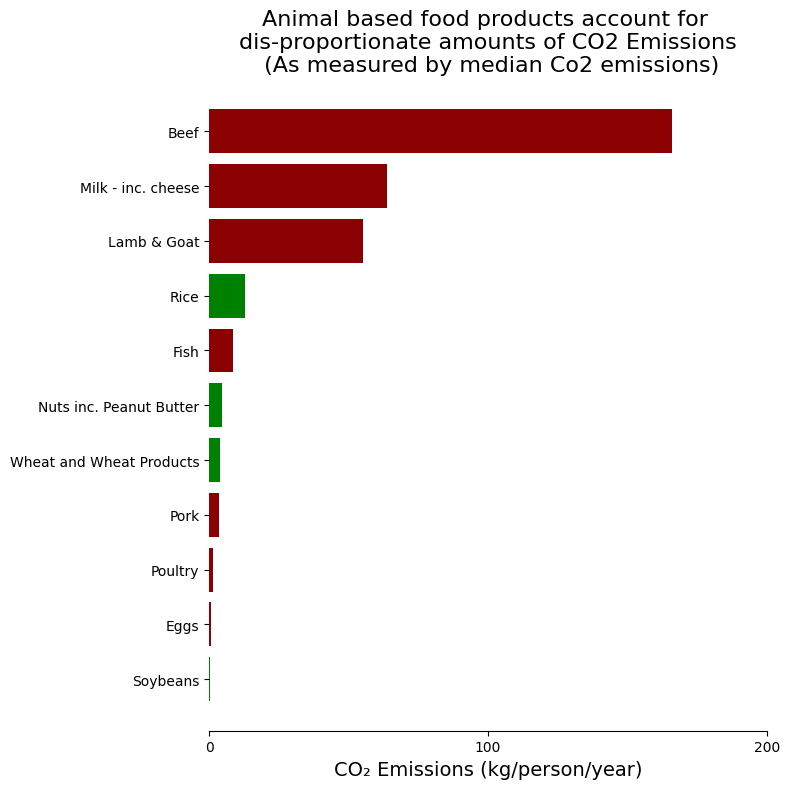

In [21]:
# Define the countries of interest
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']

# Filter the dataset for the specified East African countries
east_africa_data = foodCarbon[foodCarbon['country'].isin(east_african_countries)]

# Calculate the average CO2 emission per person by food category for these countries
avg_co2_by_food_category = east_africa_data.groupby('food_category')['co2_emmission'].mean().reset_index()

# Sort by CO2 emissions for better visualization
avg_co2_by_food_category.sort_values(by='co2_emmission', ascending=True, inplace=True)

# Define categories to color green
green_categories = ["Rice", "Wheat and Wheat Products", "Nuts inc. Peanut Butter", "Soybeans"]

# Assign colors based on the food category using numpy.where
avg_co2_by_food_category['color'] = np.where(
    avg_co2_by_food_category['food_category'].isin(green_categories), 'green', 'darkred'
)

# Plot using Matplotlib
plt.figure(figsize=(8, 8))
bars = plt.barh(
    avg_co2_by_food_category['food_category'],
    avg_co2_by_food_category['co2_emmission'],
    color=avg_co2_by_food_category['color']
)

# Add titles and labels
plt.title('Animal based food products account for \ndis-proportionate amounts of CO2 Emissions\n (As measured by median Co2 emissions)', fontsize=16)
plt.xlabel('CO₂ Emissions (kg/person/year)', fontsize=14)
#plt.ylabel('Food Category', fontsize=14)

# Customize x-axis ticks in steps of 100
plt.xticks(ticks=range(0, int(avg_co2_by_food_category['co2_emmission'].max()) + 100, 100))

# Remove the top and right spines (boundary lines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove the vertical y-axis line
plt.gca().spines['left'].set_visible(False)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='', color='gray', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The distribution plot above clearly shows that animal based foods generate more CO2 emissions per kg per person per year in comparison to plant based foods, in the given East African countries (Kenya, Uganda, Tanzania, Rwanda, Ethiopia).

- Animal-based food production often involves processing, refrigeration, and transportation, which consume large amounts of energy.
- Feeding, housing, and managing livestock require extensive resources, leading to higher emissions.
- Growing crops to feed animals adds an extra layer of emissions. For example: Crops are grown using machinery, fertilizers, and pesticides (emitting CO₂). These crops are transported to livestock farms, further adding emissions.

# Highlight the marked difference between consumption and emissions in certain food product of your choice

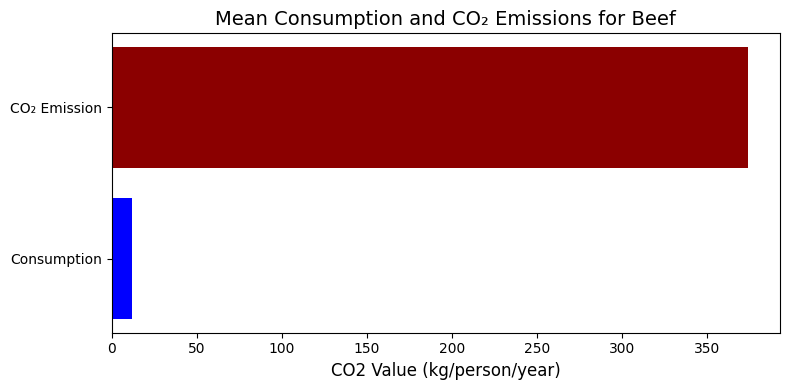

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for Beef
beef_data = foodCarbon[foodCarbon['food_category'] == 'Beef']

# Calculate the mean values for consumption and emissions
mean_consumption = beef_data['consumption'].mean()
mean_co2_emission = beef_data['co2_emmission'].mean()

# Data for the plot
metrics = ['Consumption', 'CO₂ Emission']
values = [mean_consumption, mean_co2_emission]
colors = ['blue', 'darkred']

# Create a horizontal bar plot
plt.figure(figsize=(8, 4))
plt.barh(metrics, values, color=colors)

# Add labels and title
plt.xlabel('CO2 Value (kg/person/year)', fontsize=12)
plt.title('Mean Consumption and CO₂ Emissions for Beef', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


The comparison of mean consumption and CO₂ emissions for Beef reveals a significant disparity: while the per-person consumption of Beef (measured in kg/person/year) tends to be relatively low, the associated CO₂ emissions are disproportionately high. This highlights the environmental intensity of Beef production compared to its actual consumption. Some factors that may account for this include:
- Cattle require significant feed and water resources to produce a small amount of meat, making Beef an inefficient food source.
- Large tracts of land are needed for grazing or growing feed, resulting in deforestation and habitat loss, further driving up CO₂ emissions.
- Processing and transportation of beef involve high energy use, contributing to elevated emissions.


# Food consumption of animal and non-animal products and the impact on carbon footprint.

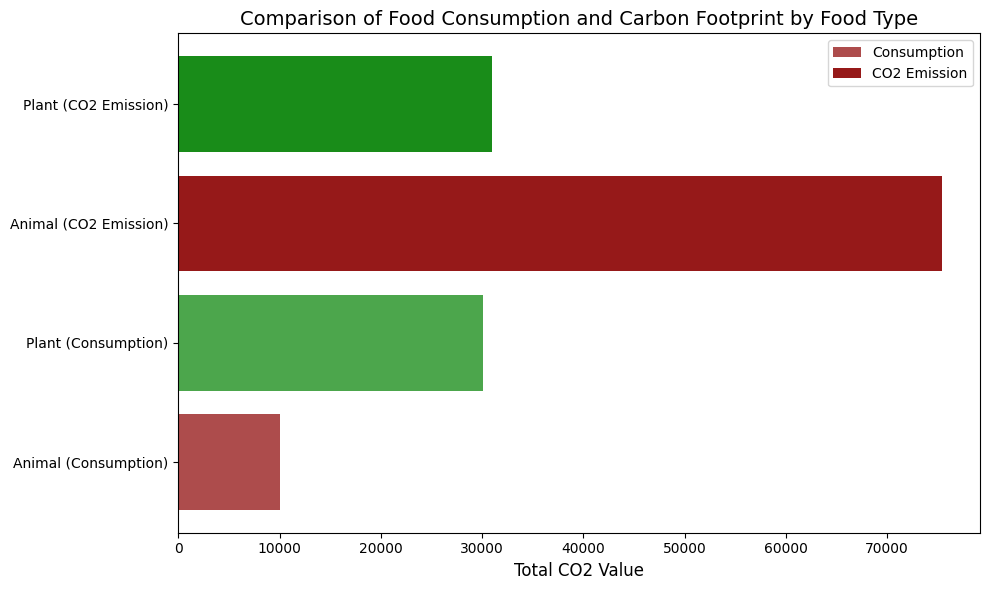

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define animal-based and plant-based food categories
animal_foods = ['Beef', 'Pork', 'Fish', 'Poultry', 'Lamb & Goat', 'Milk (incl. cheese)', 'Eggs']
plant_foods = ['Rice', 'Wheat and Wheat Products', 'Nuts inc. Peanut Butter', 'Soybeans']

# Add a new column to classify foods as animal or plant-based
foodCarbon['food_type'] = foodCarbon['food_category'].apply(
    lambda x: 'Animal' if x in animal_foods else 'Plant'
)

# Group by food type to calculate total consumption and total CO2 emissions
summary = foodCarbon.groupby('food_type').agg(
    total_consumption=('consumption', 'sum'),
    total_co2_emission=('co2_emmission', 'sum')
).reset_index()

# Set colors for the barplot
colors = ['darkred' if food == 'Animal' else 'green' for food in summary['food_type']]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))

# Plot total consumption
plt.barh(summary['food_type'] + ' (Consumption)', summary['total_consumption'], color=colors, alpha=0.7, label='Consumption')

# Plot total CO2 emissions
plt.barh(summary['food_type'] + ' (CO2 Emission)', summary['total_co2_emission'], color=colors, alpha=0.9, label='CO2 Emission')

# Add labels and title
plt.xlabel('Total CO2 Value', fontsize=12)
plt.title('Comparison of Food Consumption and Carbon Footprint by Food Type', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


Insights:
- Animal-based foods have significantly higher CO₂ emissions than plant-based foods, even if their consumption levels are comparable or lower.
- Plant-based foods, despite higher consumption in some regions, contribute far less to the overall carbon footprint, making them more environmentally sustainable.

# Global Mapping of Beef's contribution to CO2 emissions (kg/person/year)

In [14]:
import geopandas as gpd

# get geojson url
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_sovereignty.geojson"
gdf = gpd.read_file(url) # load geojson data
gdf.head() # display some basic information

,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 sovereignty,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 sovereignty,"POLYGON ((20.59025 41.8554, 20.46318 41.51509,..."
3,1,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,0,...,Asia,Western Asia,Middle East & North Africa,20,20,6,-99,1,Admin-0 sovereignty,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,1,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."


In [15]:
world1 = foodCarbon.merge(gdf, how='inner', right_on='admin', left_on='country')
world1.head()

,country,food_category,consumption,co2_emmission,food_type,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,Argentina,Pork,10.51,37.20,Animal,1,2,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
1,Argentina,Poultry,38.66,41.53,Animal,1,2,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
2,Argentina,Beef,55.48,1712.00,Animal,1,2,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
3,Argentina,Lamb & Goat,1.56,54.63,Animal,1,2,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
4,Argentina,Fish,4.36,6.96,Animal,1,2,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."


In [16]:
world1.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission', 'food_type',
       'scalerank', 'labelrank', 'sovereignt', 'sov_a3', 'adm0_dif', 'level',
       'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit', 'gu_a3', 'su_dif',
       'subunit', 'su_a3', 'brk_diff', 'name', 'name_long', 'brk_a3',
       'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en', 'formal_fr',
       'note_adm0', 'note_brk', 'name_sort', 'name_alt', 'mapcolor7',
       'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est', 'gdp_md_est',
       'pop_year', 'lastcensus', 'gdp_year', 'economy', 'income_grp',
       'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3', 'un_a3', 'wb_a2',
       'wb_a3', 'woe_id', 'adm0_a3_is', 'adm0_a3_us', 'adm0_a3_un',
       'adm0_a3_wb', 'continent', 'region_un', 'subregion', 'region_wb',
       'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart',
       'featureclass', 'geometry'],
      dtype='object')

In [17]:
columnsToDrop = ['scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3',
       'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_a3_is', 'adm0_a3_us',
       'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un', 'subregion',
       'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart',
       'featureclass',]
world1.drop(columns=columnsToDrop, inplace=True)
world1

,country,food_category,consumption,co2_emmission,food_type,geometry
0,Argentina,Pork,10.51,37.20,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
1,Argentina,Poultry,38.66,41.53,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
2,Argentina,Beef,55.48,1712.00,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
3,Argentina,Lamb & Goat,1.56,54.63,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
4,Argentina,Fish,4.36,6.96,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
...,...,...,...,...,...,...
1260,Bangladesh,Milk - inc. cheese,21.91,31.21,Plant,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
1261,Bangladesh,Wheat and Wheat Products,17.47,3.33,Plant,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
1262,Bangladesh,Rice,171.73,219.76,Plant,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
1263,Bangladesh,Soybeans,0.61,0.27,Plant,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."


In [18]:
world1 = gpd.GeoDataFrame(world1, geometry='geometry')
world1.head()

,country,food_category,consumption,co2_emmission,food_type,geometry
0,Argentina,Pork,10.51,37.20,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
1,Argentina,Poultry,38.66,41.53,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
2,Argentina,Beef,55.48,1712.00,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
3,Argentina,Lamb & Goat,1.56,54.63,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
4,Argentina,Fish,4.36,6.96,Animal,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."


In [19]:
world1.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission', 'food_type',
       'geometry'],
      dtype='object')

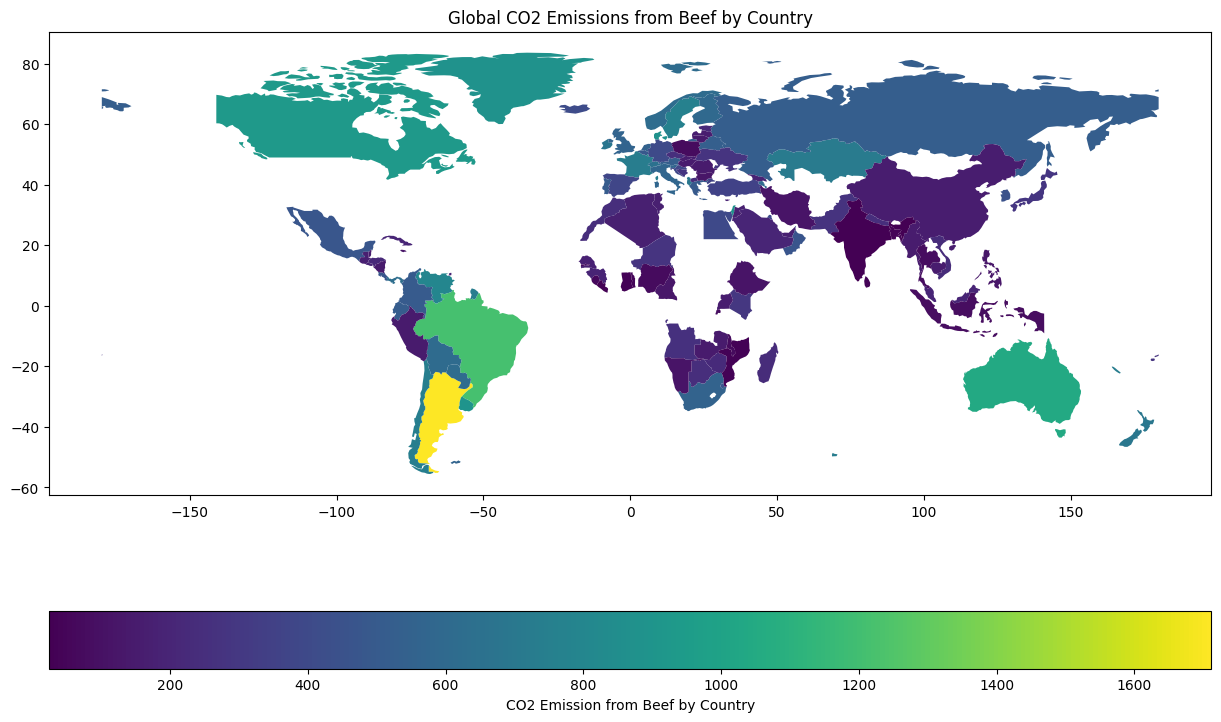

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter the GeoDataFrame for Beef-related CO2 emissions
beef_data = world1[world1['food_category'] == 'Beef']

# If needed, combine 'co2_emmission_x' and 'co2_emmission_y'
#beef_data['co2_emmission'] = beef_data['co2_emmission_x'] + beef_data['co2_emmission_y']

# Plot the world map with CO2 emissions from Beef
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # Creates a single subplot with a figure size of 15x10
beef_data.plot(column='co2_emmission', ax=ax, legend=True, cmap='viridis',
               legend_kwds={'label': "CO2 Emission from Beef by Country", 'orientation': "horizontal"})
plt.title('Global CO2 Emissions from Beef by Country')
plt.show()


Insights:
- This visualization highlights how Beef's CO₂ emissions vary by country. Countries with higher per-capita consumption of Beef will show larger contributions to the overall emissions (yellow shades). This plot can help identify regions where reducing Beef consumption could significantly reduce carbon footprints.

# Interpretation of the CO2 contributions of food levels

<ipython-input-23-23b76a5b5f4b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=foodCarbon, y='food_category', x='co2_emmission', orient='h', palette='viridis',


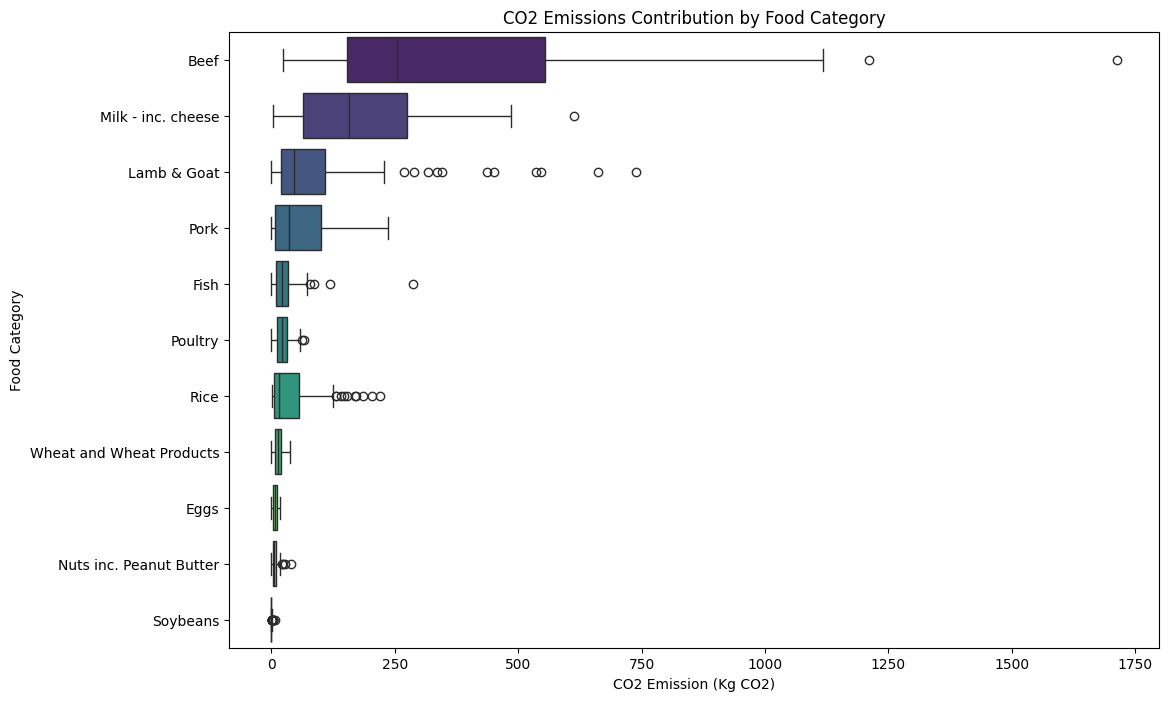

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the median CO2 emissions for each food category and sort
median_co2 = foodCarbon.groupby('food_category')['co2_emmission'].median().reset_index()
sorted_food_categories = median_co2.sort_values('co2_emmission', ascending=False)['food_category']

# Plot a horizontal box plot with sorted food categories
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=foodCarbon, y='food_category', x='co2_emmission', orient='h', palette='viridis',
            order=sorted_food_categories)  # Sorting by median CO2 emissions

# Add labels and title
plt.xlabel('CO2 Emission (Kg CO2)')
plt.ylabel('Food Category')
plt.title('CO2 Emissions Contribution by Food Category')

# Show the plot
plt.show()


- High CO2 Emission Food Categories: Categories at the top of the plot represent foods with higher environmental footprints, such as beef, dairy, and other animal products. These categories show wide variability, indicating that while most foods in this category may have a high emission footprint, some could have very low emissions compared to others.
- Low CO2 Emission Food Categories: Categories at the bottom of the plot represent foods with a lower environmental impact, like plant-based foods. The box for these categories are narrower, indicating more consistent CO2 emissions across foods in this category.

**Overall Insights:**

- The range of emissions across food categories helps you understand which foods contribute the most to carbon emissions. Meat and dairy products typically have higher emissions compared to plant-based foods.

- Consistency vs. variability within each food category can reveal whether certain foods have more predictable emissions or if there’s more variation within categories (e.g., certain meats might have higher or lower emissions based on factors like farming practices).

# Top 10 Countries with highest emissions. Choose the appropriate visual type

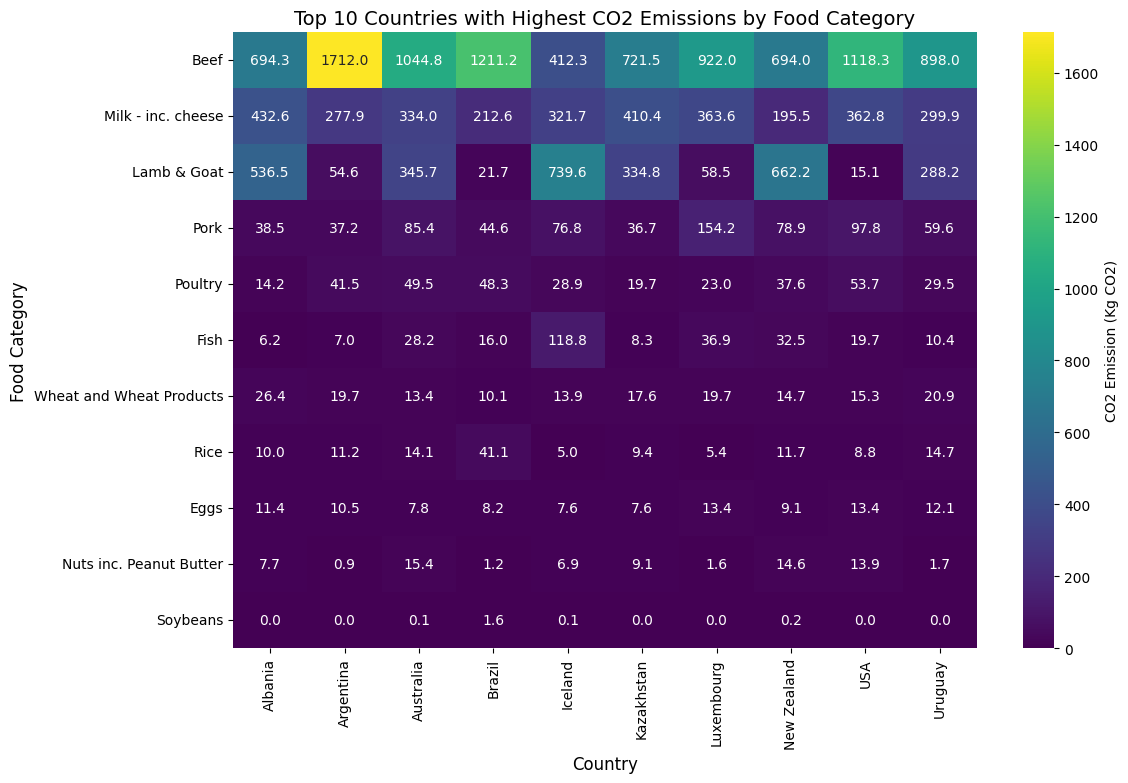

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate total emissions per country and get top 10 countries
top_countries = (
    foodCarbon.groupby('country')['co2_emmission']
    .sum()
    .nlargest(10)
    .index
)

# Step 2: Filter data for top 10 countries
filtered_df2 = foodCarbon[foodCarbon['country'].isin(top_countries)]

# Pivot the data with custom food category order
custom_order = [
    "Beef", "Milk - inc. cheese", "Lamb & Goat", "Pork", "Poultry", "Fish",
    "Wheat and Wheat Products", "Rice", "Eggs", "Nuts inc. Peanut Butter", "Soybeans"
]
pivot_table = filtered_df2.pivot_table(
    values='co2_emmission',
    index='food_category',
    columns='country',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0
).reindex(custom_order)  # Reindex rows to match the custom order

# Step 4: Plot the table as a heatmap using Seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
sns.heatmap(
    pivot_table,
    annot=True,         # Annotate cells with the numeric values
    fmt=".1f",          # Format annotations to 1 decimal place
    cmap="viridis",     # Color map for the heatmap
    cbar_kws={'label': 'CO2 Emission (Kg CO2)'}  # Add a color bar label
)

# Add labels and title
plt.title('Top 10 Countries with Highest CO2 Emissions by Food Category', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Food Category', fontsize=12)

# Show the plot
plt.show()


Here are some insights from the heatmap table of the Top 10 Countries by CO2 Emissions and their associated food products:


- Beef has the highest CO2 emissions across all food categories for most countries. For instance, Argentina (1712 kg CO2) and USA (1118 kg CO2) are particularly prominent contributors, highlighting the environmental impact of beef production.


- Argentina, Brazil, and Uruguay show significantly higher emissions from beef compared to other food products. This reflects the dominance of livestock farming, especially cattle, in these countries.
In contrast, countries like Kazakhstan and New Zealand exhibit more balanced emissions across multiple food categories.
Milk and Dairy Products:

- After beef, Milk - incl. cheese has notable contributions in most countries, with countries like Brazil (410.4 kg CO2) and Iceland (362.8 kg CO2) showing high emissions. This is likely due to dairy farming practices in these regions.
Lamb & Goat:

- Lamb & Goat products contribute significantly to CO2 emissions in countries like Iceland (739.6 kg CO2), reflecting the importance of sheep farming in colder climates.
Diverse Contributors:

- Countries like Kazakhstan show relatively higher emissions for categories like Fish (118.8 kg CO2), highlighting fishing practices or reliance on aquatic food sources.
- Eggs and Rice tend to have lower emissions compared to livestock products, but their contributions are still noticeable in some countries, such as Brazil and New Zealand.
Soybeans and Nuts:

- Categories like Soybeans and Nuts inc. Peanut Butter have minimal CO2 emissions across all countries, suggesting that plant-based food products generally have a smaller carbon footprint compared to animal-based products.
General Trend:

The heatmap highlights the disproportionate impact of animal-based food products (Beef, Lamb & Goat, and Milk) compared to plant-based foods (Soybeans, Rice, and Wheat), emphasizing the environmental challenges associated with livestock farming.
These insights emphasize the need to focus on sustainable agricultural practices, particularly for high-emission food categories like beef and dairy, to mitigate the environmental impact of food production

# **Insights and the story behind my exploration.**


**The Story Behind Exploring Food Carbon Footprints**
- The exploration of food carbon footprints reveals critical insights into the environmental impacts of our dietary choices, focusing on the stark contrast between the carbon emissions of plant-based and animal-based foods. By examining consumption patterns and CO₂ emissions across various food categories and countries, this study sheds light on the environmental challenges associated with food production and highlights opportunities for sustainable practices.

# **Key insights**

Disproportionate Emissions from Animal-Based Foods. The distribution analysis shows that animal-based foods generate significantly higher CO₂ emissions per kg per person per year compared to plant-based foods, particularly in East African countries (Kenya, Uganda, Tanzania, Rwanda, Ethiopia). This disparity arises from several factors:

1.	Feeding, housing, and managing livestock require extensive resources. Crops used as animal feed are cultivated using machinery, fertilizers, and pesticides, all of which emit CO₂. Additionally, these crops are transported to livestock farms, adding another layer of emissions.
2.	Animal-based food production involves processing, refrigeration, and transportation, which consume large amounts of energy, contributing further to emissions.

- This highlights the inefficiency of animal-based food production and underscores the need to explore plant-based alternatives for reducing emissions.


The Environmental Intensity of Beef Production
The comparison of mean consumption and CO₂ emissions for Beef reveals a striking contrast. While per-person consumption of Beef is relatively low, the associated CO₂ emissions are disproportionately high. Key drivers of this disparity include:

1.	High Resource Requirements: Cattle require significant amounts of feed and water to produce a small amount of meat, making beef production one of the most inefficient food systems.
2.	Deforestation and Habitat Loss: Large tracts of land are converted for grazing or growing animal feed, leading to deforestation, biodiversity loss, and increased carbon emissions.
3.	Energy Usage: The processing, refrigeration, and transportation of beef are energy-intensive, further elevating emissions.

- This underscores the environmental intensity of beef production and its outsized contribution to global carbon footprints despite its modest consumption levels.


In contrast to animal-based foods, plant-based foods like rice, wheat, nuts, and soybeans contribute far less to CO₂ emissions, even when their consumption levels are higher. Plant-based food production is more efficient in terms of land, water, and energy usage, making it a more sustainable option. This stark difference highlights the environmental benefits of shifting dietary patterns toward plant-based foods.

Visualization of CO₂ emissions by country emphasizes the dominance of beef in global emissions. Countries with higher per-capita beef consumption, such as Argentina, Brazil, and the USA, show disproportionately high contributions to overall emissions. This reflects the prevalence of livestock farming in these regions and its environmental impact.
In contrast, countries like Kazakhstan and New Zealand exhibit more balanced emissions across multiple food categories. This data underscores the potential for targeted policy interventions in high-emission regions, such as promoting alternative protein sources or reducing beef consumption.


The range of emissions across food categories reveals valuable insights into the variability of carbon footprints:

-	High CO₂ Emission Foods: Categories like beef, lamb, and dairy exhibit wide variability in emissions. While these foods generally have high environmental footprints, the variation suggests that farming practices significantly influence their emissions.

-	Low CO₂ Emission Foods: Plant-based foods like rice, wheat, and soybeans show narrower variability, indicating more consistent emissions across production systems.

- These observations highlight the importance of adopting best practices in farming to minimize emissions, especially for high-impact foods like beef and dairy.


Analysis of the Top 10 Countries by CO₂ Emissions provides a global perspective on food-related emissions. Key insights include:

-	Beef consistently ranks as the highest-emission food category in most countries. For example, Argentina (1712 kg CO₂) and the USA (1118 kg CO₂) are notable contributors, reflecting the environmental cost of cattle farming.
-	Dairy products like milk and cheese contribute significantly to emissions, particularly in countries like Brazil and Iceland, where dairy farming is prevalent.
-	Regional variations in countries like Kazakhstan, show higher emissions for fish, highlighting the environmental impact of fishing practices in specific regions.
-	Plant-based foods like Soybeans, nuts, and rice have minimal emissions across all countries, reinforcing their role as environmentally sustainable food options.

The analysis reveals that animal-based foods, particularly beef and dairy, are disproportionately responsible for CO₂ emissions, whereas plant-based foods have a far smaller carbon footprint. Shifting toward plant-based foods can significantly reduce global carbon emissions while promoting more efficient resource use. Regions with high beef and dairy consumption, such as South America and North America, offer significant opportunities for emission reductions through dietary changes and sustainable agricultural practices. The variability in emissions within food categories suggests that adopting best practices, such as regenerative farming or reducing food waste, can mitigate environmental impacts.


